In [1]:
# Imports
import numpy as np
import pandas as pd
from scipy import optimize
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, WhiteKernel, ConstantKernel
from scipy.optimize import root_scalar
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.ticker as ticker
from matplotlib.ticker import MultipleLocator
from math import ceil
%matplotlib notebook
from ipywidgets import *


Bad key text.latex.preview in file /Users/tnye/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /Users/tnye/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file /Users/tnye/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the default quality p

In [2]:
# Data 

sm_df = pd.read_csv('/Users/tnye/tsuquakes/gaussian_process/HF_mean_residuals_corrected.csv')

stress = sm_df['stress drop'].values
HF_res = sm_df['HF res'].values

# Define input
oneD_data = np.array(stress).reshape(-1, 1)

# Define prediction grid
oneD_x = np.linspace(0.1,4,100)
oneD_X = oneD_x.reshape(-1, 1)

<IPython.core.display.Javascript object>


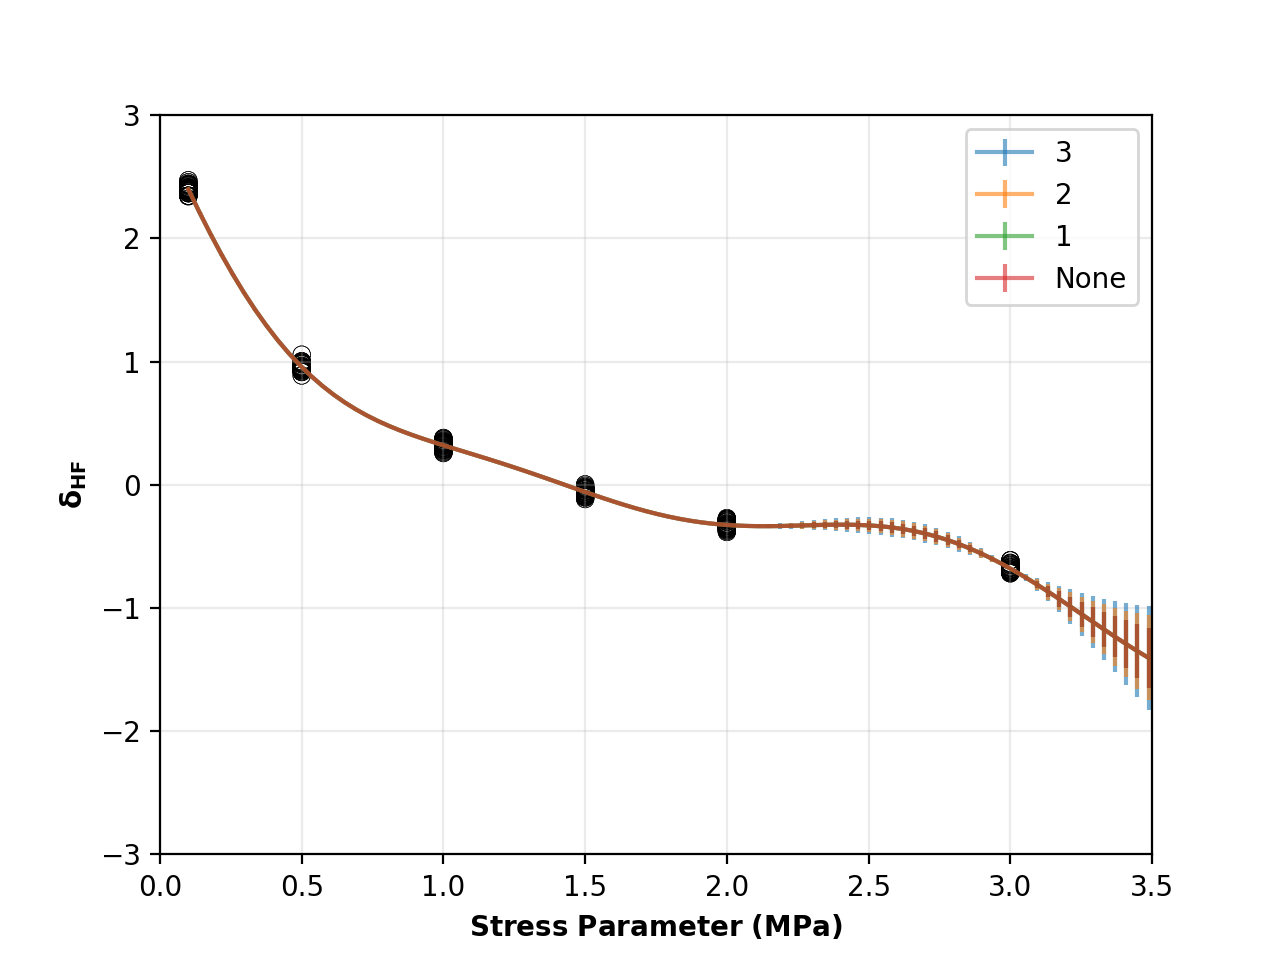

1.4280704498291015
1.428066444396972
1.4280704498291015
1.4280704498291015


In [4]:
# Chaning constant kernel values

kernels = [ConstantKernel(3.0, constant_value_bounds="fixed") * RBF(1.0, length_scale_bounds="fixed"),
           ConstantKernel(2.0, constant_value_bounds="fixed") * RBF(1.0, length_scale_bounds="fixed"),
           ConstantKernel(1.0, constant_value_bounds="fixed") * RBF(1.0, length_scale_bounds="fixed"),
           None
          ]

labels = ['3','2','1','None']

fig, ax = plt.subplots(1,1)

mean_list = []

for i, kernel in enumerate(kernels):

    oneD_gp = GaussianProcessRegressor(kernel=kernel,n_restarts_optimizer=9)
    
    # Get grid predictions
    oneD_gp.fit(oneD_data, HF_res)
    oneD_pred, oneD_std = oneD_gp.predict(oneD_X, return_std=True)
    hf_res_std = np.std(oneD_pred)
    
    mean_list.append(oneD_pred)
    
    # Plot
    ax.grid(alpha=0.25)
    ax.scatter(stress,HF_res,facecolors='none',edgecolors='k',lw=0.2,s=40,alpha=0.7)
    ax.errorbar(oneD_x, oneD_pred, oneD_std, alpha=0.6, label = labels[i])
    ax.set_xlim(0,3.5)
    ax.set_ylim(-3,3)
    ax.set_xlabel(r'$\bf{Stress}$ $\bf{Parameter}$ $\bf{(MPa)}$',fontsize=10)
    ax.set_ylabel(r'$\bf{\delta_{HF}}$',fontsize=10)
    ax.tick_params(axis='both', which='major', labelsize=10)
    
    # Define the mean function based on the GPR predictions
    def oneD_objective_function(x):
        y_mean, _ = oneD_gp.predict(np.array([x]).reshape(-1, 1), return_std=True)
        return abs(y_mean[0])

    initial_guess = np.array([1.5])
    x_cross_zero = minimize(oneD_objective_function, initial_guess, method='Nelder-Mead', tol=1e-7).x[0]
    print(x_cross_zero)

ax.legend(loc='upper right')



<IPython.core.display.Javascript object>


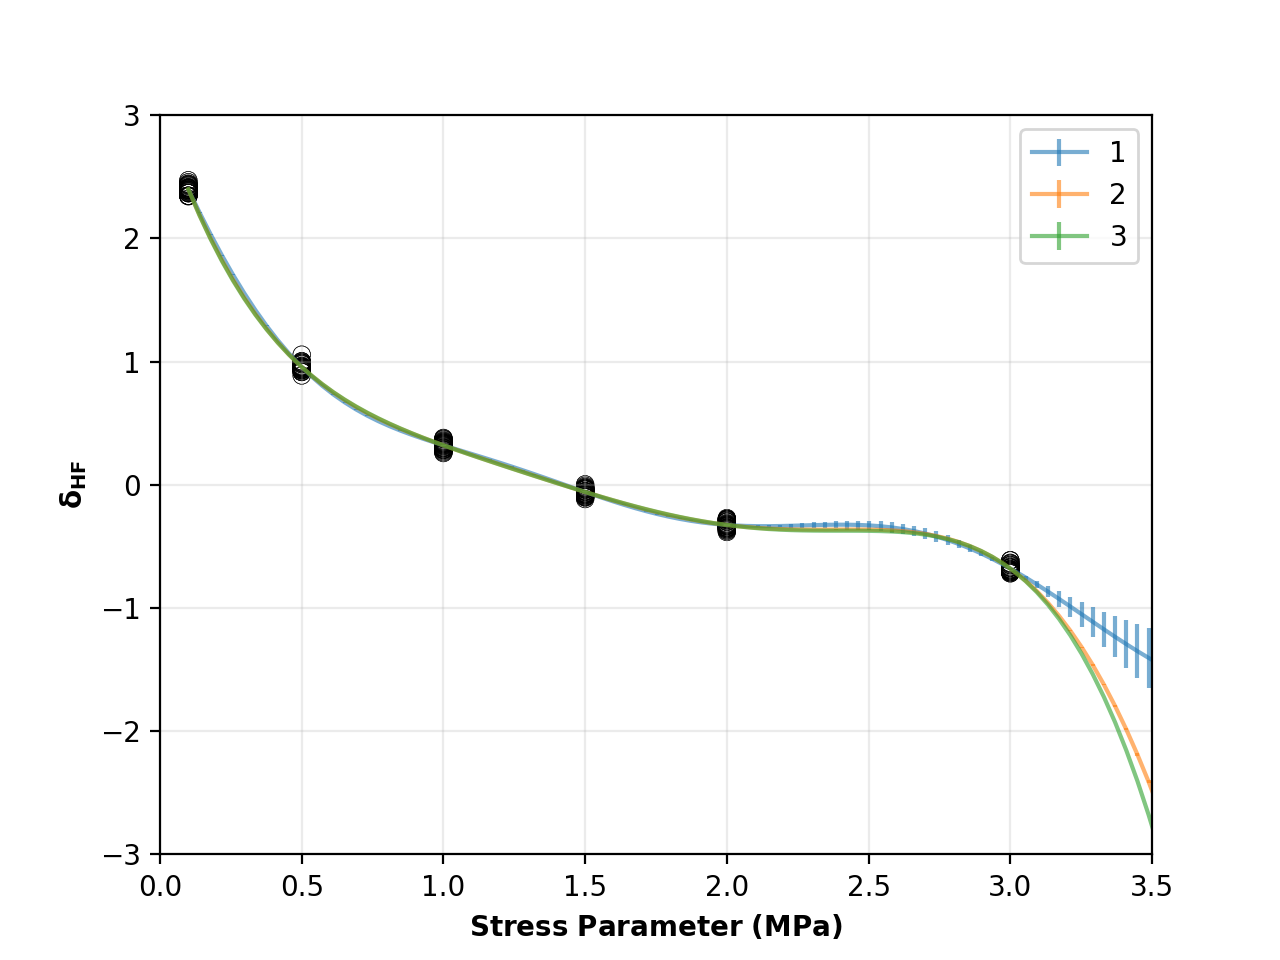

1.4280704498291015
1.4200040817260744
1.4187149137258528


In [6]:
# Chaning length scale values

# kernels = [ConstantKernel(1.0, constant_value_bounds="fixed") * RBF(0.1, length_scale_bounds="fixed"),
#            ConstantKernel(1.0, constant_value_bounds="fixed") * RBF(1.0, length_scale_bounds="fixed"),
#            ConstantKernel(1.0, constant_value_bounds="fixed") * RBF(2.0, length_scale_bounds="fixed"),
#            ConstantKernel(1.0, constant_value_bounds="fixed") * RBF(3.0, length_scale_bounds="fixed"), 
#           ]

# labels = ['0.1','1','2','3']

kernels = [ConstantKernel(1.0, constant_value_bounds="fixed") * RBF(1.0, length_scale_bounds="fixed"),
           ConstantKernel(1.0, constant_value_bounds="fixed") * RBF(2.0, length_scale_bounds="fixed"),
           ConstantKernel(1.0, constant_value_bounds="fixed") * RBF(3.0, length_scale_bounds="fixed"), 
          ]

labels = ['1','2','3']

fig, ax = plt.subplots(1,1)

mean_list = []

for i, kernel in enumerate(kernels):

    oneD_gp = GaussianProcessRegressor(kernel=kernel,n_restarts_optimizer=9)
    
    # Get grid predictions
    oneD_gp.fit(oneD_data, HF_res)
    oneD_pred, oneD_std = oneD_gp.predict(oneD_X, return_std=True)
    hf_res_std = np.std(oneD_pred)
    
    mean_list.append(oneD_pred)
    
    # Plot
    ax.grid(alpha=0.25)
    ax.scatter(stress,HF_res,facecolors='none',edgecolors='k',lw=0.2,s=40,alpha=0.7)
    ax.errorbar(oneD_x, oneD_pred, oneD_std, alpha=0.6, label = labels[i])
    ax.set_xlim(0,3.5)
    ax.set_ylim(-3,3)
    ax.set_xlabel(r'$\bf{Stress}$ $\bf{Parameter}$ $\bf{(MPa)}$',fontsize=10)
    ax.set_ylabel(r'$\bf{\delta_{HF}}$',fontsize=10)
    ax.tick_params(axis='both', which='major', labelsize=10)
    
    # Define the mean function based on the GPR predictions
    def oneD_objective_function(x):
        y_mean, _ = oneD_gp.predict(np.array([x]).reshape(-1, 1), return_std=True)
        return abs(y_mean[0])

    initial_guess = np.array([1.5])
    x_cross_zero = minimize(oneD_objective_function, initial_guess, method='Nelder-Mead', tol=1e-7).x[0]
    print(x_cross_zero)

ax.legend(loc='upper right')

<IPython.core.display.Javascript object>


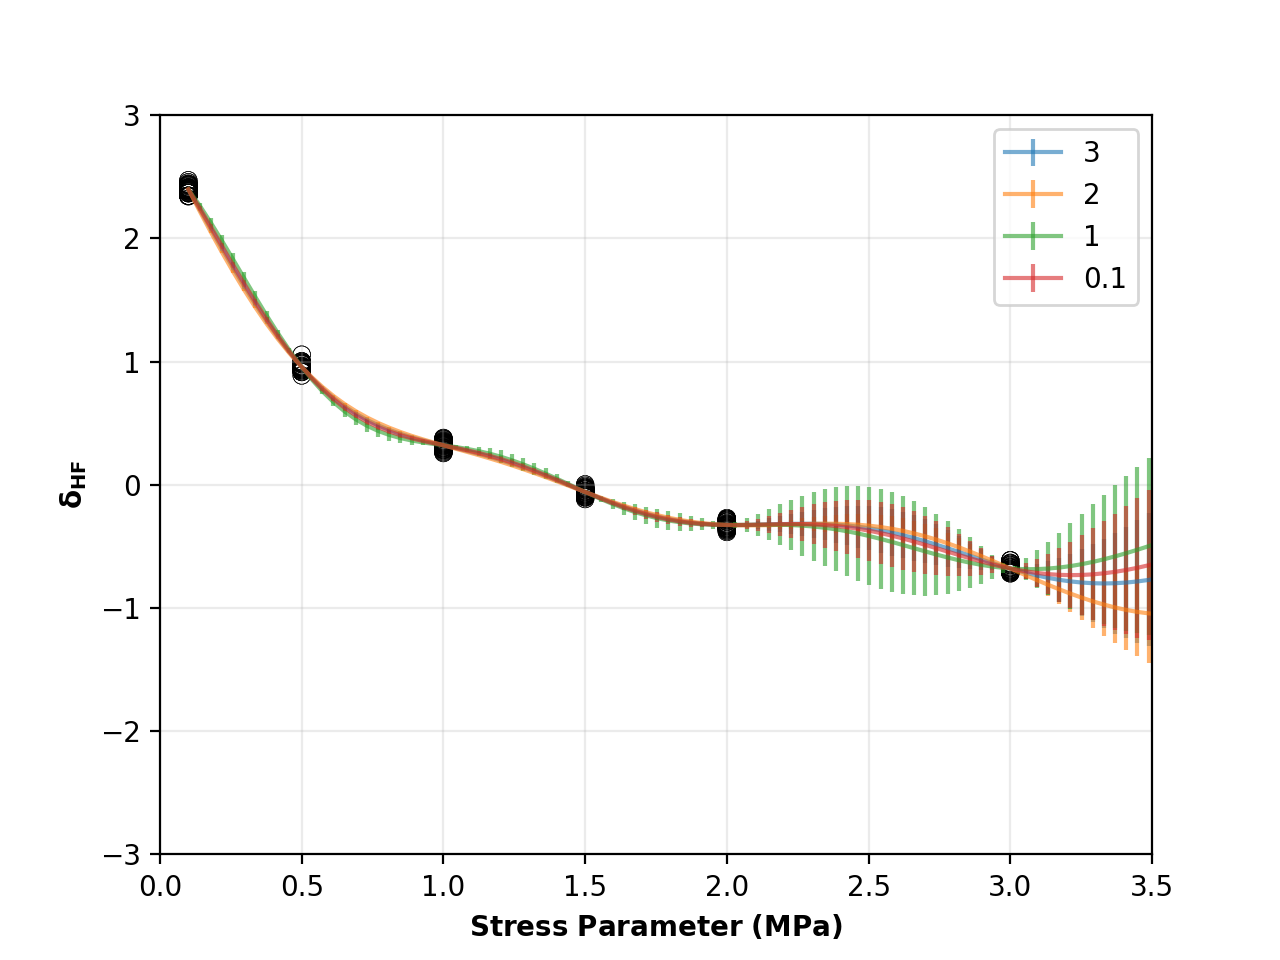

/Users/tnye/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/Users/tnye/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


1.438105201721191
1.4329637289047241
1.4460931068286298


/Users/tnye/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/Users/tnye/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


1.4410740137100218


In [8]:
# Chaning length scale values with length scale bounds

kernels = [RBF(3.0, length_scale_bounds=(0.4,3.4)),
           RBF(2.0, length_scale_bounds=(0.4,3.4)),
           RBF(1.0, length_scale_bounds=(0.4,3.4)),
           RBF(0.1, length_scale_bounds=(0.4,3.4)), 
          ]

labels = ['3','2','1','0.1']

fig, ax = plt.subplots(1,1)

mean_list = []

for i, kernel in enumerate(kernels):

    oneD_gp = GaussianProcessRegressor(kernel=kernel,n_restarts_optimizer=9)
    
    # Get grid predictions
    oneD_gp.fit(oneD_data, HF_res)
    oneD_pred, oneD_std = oneD_gp.predict(oneD_X, return_std=True)
    hf_res_std = np.std(oneD_pred)
    
    mean_list.append(oneD_pred)
    
    # Plot
    ax.grid(alpha=0.25)
    ax.scatter(stress,HF_res,facecolors='none',edgecolors='k',lw=0.2,s=40,alpha=0.7)
    ax.errorbar(oneD_x, oneD_pred, oneD_std, alpha=0.6, label = labels[i])
    ax.set_xlim(0,3.5)
    ax.set_ylim(-3,3)
    ax.set_xlabel(r'$\bf{Stress}$ $\bf{Parameter}$ $\bf{(MPa)}$',fontsize=10)
    ax.set_ylabel(r'$\bf{\delta_{HF}}$',fontsize=10)
    ax.tick_params(axis='both', which='major', labelsize=10)
    
    # Define the mean function based on the GPR predictions
    def oneD_objective_function(x):
        y_mean, _ = oneD_gp.predict(np.array([x]).reshape(-1, 1), return_std=True)
        return abs(y_mean[0])

    initial_guess = np.array([1.5])
    x_cross_zero = minimize(oneD_objective_function, initial_guess, method='Nelder-Mead', tol=1e-7).x[0]
    print(x_cross_zero)

ax.legend(loc='upper right')